In [1]:
# Importación de librerías necesarias
import pandas as pd
# Importación de librerías necesarias
import numpy as np
# Importación de librerías necesarias
import seaborn as sns
# Importación de librerías necesarias
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
# Divide el dataset en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
# Escalado de características para normalizar los datos
from sklearn.preprocessing import StandardScaler

In [2]:
# Carga del dataset abalone desde archivo CSV
df=pd.read_csv('./data/abalone.csv', sep=';')
# Muestra la cantidad de filas y columnas del dataset
print('filas:', df.shape[0], 'columnas:', df.shape[1])
# Muestra una muestra aleatoria de 3 filas del dataset
df.sample(3)

filas: 3676 columnas: 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
2249,F,0.585,0.455,0.165,0.998,0.345,0.2495,0.3150,12,1
1555,I,0.410,0.300,0.090,0.280,0.141,0.0575,0.0750,8,0
3460,F,0.650,0.525,0.165,1.238,0.647,0.2485,0.3005,9,0


In [3]:
# Separa características predictoras (X) excluyendo la variable objetivo y columnas no numéricas
X=df.drop(columns=['Adulto', 'Sex'], axis=1)
# Variable objetivo (y) que indica si el abulón es adulto
y=df['Adulto']

In [4]:
# Cuenta la cantidad de ejemplos por clase en la variable objetivo
print(y.groupby(y).count())

Adulto
0    2073
1    1603
Name: Adulto, dtype: int64


In [5]:
# Divide el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)
# Muestra la cantidad de filas y columnas del dataset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.head())

(2573, 8) (1103, 8) (2573,) (1103,)
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
752    0.605      0.46   0.170        1.1220          0.3470          0.3045   
3022   0.460      0.37   0.110        0.3965          0.1485          0.0855   
2185   0.445      0.34   0.120        0.4475          0.1930          0.1035   
3672   0.560      0.43   0.155        0.8675          0.4000          0.1720   
225    0.500      0.37   0.135        0.4500          0.1715          0.1055   

      Shell_weight  Rings  
752         0.3150     13  
3022        0.1455      8  
2185        0.1300      9  
3672        0.2290      8  
225         0.1550      9  


In [6]:
# Escalado de características para normalizar los datos
scaler = StandardScaler()
# Aplica el escalado a los datos de entrenamiento
X_train = pd.DataFrame(scaler.fit_transform(X_train))
# Aplica el mismo escalado a los datos de prueba
X_test = pd.DataFrame(scaler.transform(X_test))

In [7]:
# Se crea una instancia del clasificador KNN
from sklearn.neighbors import KNeighborsClassifier
# Se crea una instancia del clasificador KNN
model = KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [8]:
# Definición de la validación cruzada estratificada con 10 folds
from sklearn.model_selection import StratifiedKFold
# Definición de la validación cruzada estratificada con 10 folds
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=19)

In [9]:
# Validación cruzada para varios valores de k en KNN
from sklearn.model_selection import cross_val_score
k_range = range(1, 31)
k_scores = []
for k in k_range:
# Se crea una instancia del clasificador KNN
    knn = KNeighborsClassifier(n_neighbors=k)
# Validación cruzada para varios valores de k en KNN
    scores = cross_val_score(knn, X_train, y_train, cv=folds, scoring='accuracy')
    k_scores.append(scores.mean())

In [10]:
for i, value in enumerate(k_scores):
    print(f'k={i+1} accuracy={value:.4f}')

k=1 accuracy=0.8492
k=2 accuracy=0.8496
k=3 accuracy=0.8838
k=4 accuracy=0.8768
k=5 accuracy=0.8900
k=6 accuracy=0.8885
k=7 accuracy=0.8920
k=8 accuracy=0.8912
k=9 accuracy=0.8947
k=10 accuracy=0.8935
k=11 accuracy=0.8920
k=12 accuracy=0.8920
k=13 accuracy=0.8966
k=14 accuracy=0.8908
k=15 accuracy=0.8935
k=16 accuracy=0.8892
k=17 accuracy=0.8947
k=18 accuracy=0.8923
k=19 accuracy=0.8951
k=20 accuracy=0.8939
k=21 accuracy=0.8927
k=22 accuracy=0.8916
k=23 accuracy=0.8927
k=24 accuracy=0.8923
k=25 accuracy=0.8951
k=26 accuracy=0.8927
k=27 accuracy=0.8920
k=28 accuracy=0.8900
k=29 accuracy=0.8912
k=30 accuracy=0.8888


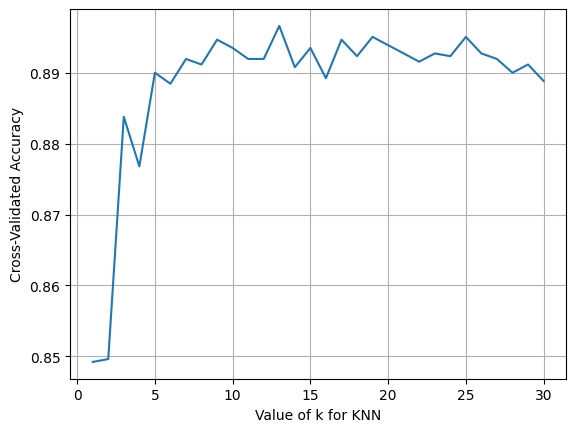

In [11]:
# Grafica la exactitud promedio según el valor de k
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()

In [12]:
# Búsqueda exhaustiva de hiperparámetros con validación cruzada
from sklearn.model_selection import GridSearchCV

In [13]:
# Se crea una instancia del clasificador KNN
knn = KNeighborsClassifier()

In [14]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [15]:
# Definición de la validación cruzada estratificada con 10 folds
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=19)

In [16]:
# Búsqueda exhaustiva de hiperparámetros con validación cruzada
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy')

In [17]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [18]:
pd.DataFrame(grid.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011110,0.003419,0.030188,0.005962,1,{'n_neighbors': 1},0.879845,0.860465,0.813953,0.856031,0.824903,0.821012,0.856031,0.840467,0.867704,0.871595,0.849201,0.021695,30
1,0.009998,0.001735,0.027816,0.001395,2,{'n_neighbors': 2},0.844961,0.852713,0.833333,0.844358,0.832685,0.852140,0.863813,0.828794,0.867704,0.875486,0.849599,0.014996,29
2,0.009788,0.001094,0.028621,0.001416,3,{'n_neighbors': 3},0.922481,0.875969,0.856589,0.887160,0.887160,0.887160,0.875486,0.867704,0.883268,0.894942,0.883792,0.016687,27


In [19]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [20]:
grid.best_score_

np.float64(0.8966171990468436)

In [21]:
grid.best_params_

{'n_neighbors': 13}

In [22]:
y_pred_grid = grid.predict(X_test)

In [23]:
# Calcula la matriz de confusión
from sklearn.metrics import confusion_matrix

In [24]:
# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_grid)
print(confusion)

[[567  78]
 [ 53 405]]


In [25]:
# Muestra métricas de rendimiento: precisión, recall, F1
from sklearn.metrics import classification_report
# Muestra métricas de rendimiento: precisión, recall, F1
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       645
           1       0.84      0.88      0.86       458

    accuracy                           0.88      1103
   macro avg       0.88      0.88      0.88      1103
weighted avg       0.88      0.88      0.88      1103



In [26]:
# Búsqueda aleatoria de hiperparámetros con validación cruzada
from sklearn.model_selection import RandomizedSearchCV

In [27]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [28]:
# Búsqueda aleatoria de hiperparámetros con validación cruzada
random = RandomizedSearchCV(knn, param_grid, n_iter=10, cv=folds, scoring='accuracy', random_state=10)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]},
                   random_state=10, scoring='accuracy')

In [29]:
pd.DataFrame(random.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011508,0.001738,0.039192,0.003904,21,{'n_neighbors': 21},0.922481,0.868217,0.872093,0.898833,0.891051,0.898833,0.879377,0.887160,0.898833,0.910506,0.892738,0.015974,2
1,0.010309,0.001436,0.032698,0.004862,8,{'n_neighbors': 8},0.937984,0.883721,0.875969,0.879377,0.891051,0.910506,0.883268,0.879377,0.879377,0.891051,0.891168,0.018253,4
2,0.009907,0.000703,0.029447,0.001940,6,{'n_neighbors': 6},0.930233,0.875969,0.856589,0.883268,0.894942,0.898833,0.887160,0.875486,0.883268,0.898833,0.888458,0.018433,7


In [30]:
print(random.best_estimator_)
print(random.best_score_)
print(random.best_params_)

KNeighborsClassifier(n_neighbors=13)
0.8966171990468436
{'n_neighbors': 13}


In [31]:
# Muestra métricas de rendimiento: precisión, recall, F1
print(classification_report(y_test, random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       645
           1       0.84      0.88      0.86       458

    accuracy                           0.88      1103
   macro avg       0.88      0.88      0.88      1103
weighted avg       0.88      0.88      0.88      1103



In [32]:
# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, random.predict(X_test))
print(confusion)

[[567  78]
 [ 53 405]]
